* Planning to use pytorch/torchvision which has StanfordCars dataset for classifying make/model of cars
  https://pytorch.org/vision/main/datasets.html

In [2]:
import torch
import torchvision

In [2]:
sc_dataset = torchvision.datasets.StanfordCars('stanford_cars_dataset')

RuntimeError: Dataset not found. Try to manually download following the instructions in https://github.com/pytorch/vision/issues/7545#issuecomment-1631441616.

Above error seems to be because stanford cars dataset url is no longer available. Instructions here explain how to manually download it elsewhere and then register it.
https://pytorch.org/vision/main/generated/torchvision.datasets.StanfordCars.html#torchvision.datasets.StanfordCars


In [5]:
import kagglehub


c:\users\bwiec\Documents\ece5831-2024-assignments\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Download latest version
path = kagglehub.dataset_download("jessicali9530/stanford-cars-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.82G/1.82G [03:32<00:00, 9.22MB/s]

Extracting files...


Path to dataset files: C:\Users\bwiec\.cache\kagglehub\datasets\jessicali9530\stanford-cars-dataset\versions\2


For the above to work, had to register for kaggle and in my profile, I could generate a token which downloads a kaggle.json file which needs to be put into ~/.kaggle. Then the download above was successfull

In [16]:
#sc_dataset = torchvision.datasets.StanfordCars(root='C:/Users/bwiec/.cache/kagglehub/datasets/jessicali9530/stanford-cars-dataset/versions/2', download=False)
sc_dataset = torchvision.datasets.StanfordCars(root='./2', download=False)

RuntimeError: Dataset not found. Try to manually download following the instructions in https://github.com/pytorch/vision/issues/7545#issuecomment-1631441616.

Using the above dataset from jessicali9530 didn't seem to have the right files. Trying the other repo

In [7]:
import kaggle


In [8]:
kaggle.api.dataset_download_files('rickyyyyyyy/torchvision-stanford-cars', path='stanford_cars_dataset', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/rickyyyyyyy/torchvision-stanford-cars


In [9]:
sc_dataset = torchvision.datasets.StanfordCars(root='./stanford_cars_dataset', download=False)

Download CNRPARK dataset

In [10]:
kaggle.api.dataset_download_files('ddsshubham/cnrpark-ext', path='cnrpark_dataset', unzip=True)

2024-11-29 10:41:47,608 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'RemoteDisconnected('Remote end closed connection without response')': /api/v1/datasets/download/ddsshubham/cnrpark-ext?datasetVersionNumber=None


Dataset URL: https://www.kaggle.com/datasets/ddsshubham/cnrpark-ext


Try resnet50

In [11]:
from torchvision.models import resnet50, ResNet50_Weights



In [12]:
# Use pre-trained weights per https://pytorch.org/vision/stable/models.html

# Old weights with accuracy 76.130%
resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

# New weights with accuracy 80.858%
resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

# Best available weights (currently alias for IMAGENET1K_V2)
# Note that these weights may change across versions
resnet50(weights=ResNet50_Weights.DEFAULT)

# Strings are also supported
resnet50(weights="IMAGENET1K_V2")

# No weights - random initialization
resnet50(weights=None)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/bwiec/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:08<00:00, 11.4MB/s]
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /home/bwiec/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:08<00:00, 11.6MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [13]:
from torchvision import io

In [15]:
img = torchvision.io.read_image('./data/img1.jpg')

In [16]:
# Preprocess image
# Initialize the Weight Transforms
weights = ResNet50_Weights.DEFAULT
preprocess = weights.transforms()

# Apply it to the input image
img_transformed = preprocess(img)

In [17]:
# Switch to evaluation model w/ batchnorm or whatever
# Initialize model
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)

# Set model to eval mode
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Trying some code from brave search on using resnet50

In [18]:
import torch
import torchvision
import torchvision.transforms as transforms

# Load a pre-trained ResNet50 model
model = torchvision.models.resnet50(weights=torchvision.models.ResNet50_Weights.DEFAULT)

# Set the model to evaluation mode
model.eval()

# Define image transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load an image
from PIL import Image
img = Image.open("data/img1.jpg")

# Apply transformations to the image
img = transform(img)

# Add a batch dimension
img = img.unsqueeze(0)

# Perform inference
with torch.no_grad():
    output = model(img)

# Get the predicted class
_, predicted = torch.max(output, 1)
print("Predicted class:", predicted.item())

Predicted class: 656


Realized resnet50 is just a classification network - Trying fasterrcnn instead from:
https://pytorch.org/vision/stable/models.html#object-detection-instance-segmentation-and-person-keypoint-detection

In [ ]:
from torchvision.io.image import decode_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image

img = decode_image("data/img1.jpg")

# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors="red",
                          width=4, font_size=30)
im = to_pil_image(box.detach())
im.show()




Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /home/bwiec/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100%|██████████| 167M/167M [00:15<00:00, 11.3MB/s] 
/home/bwiec/sandbox/ece5831-2024-final-project/.venv/lib/python3.10/site-packages/torchvision/utils.py:225: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


In [20]:
import matplotlib.pyplot as plt


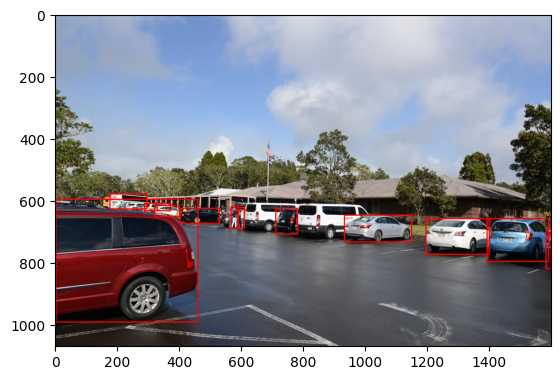

In [21]:
plt.imshow(im)

Now try on a cnrpark image

In [22]:
img_path = 'cnrpark_dataset/CNR-EXT_FULL_IMAGE_1000x750/FULL_IMAGE_1000x750/SUNNY/2015-11-12/camera1/2015-11-12_0909.jpg'


/home/bwiec/sandbox/ece5831-2024-final-project/.venv/lib/python3.10/site-packages/torchvision/utils.py:225: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


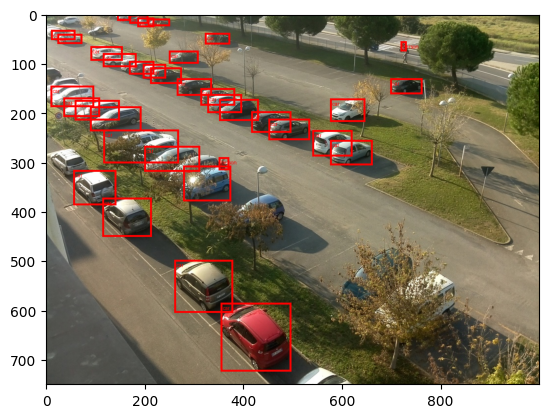

In [23]:
img = decode_image(img_path)



# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors="red",
                          width=4, font_size=30)
im = to_pil_image(box.detach())

plt.imshow(im)